In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
%run 'functions.py'

In [3]:
total_usage_2012 = pd.read_parquet('../data/total_usage_2012.gzip')
total_usage_2013 = pd.read_parquet('../data/total_usage_2013.gzip')
# total_usage_2014 = pd.read_parquet('../data/total_usage_2014.gzip')

In [4]:
df_2012_treatment, df_2012_control = split_t_c(total_usage_2012)
df_2013_treatment, df_2013_control = split_t_c(total_usage_2013)

In [5]:
a_2012, b_2012, a_2013, b_2013 = get_alpha_beta(df_2012_treatment, df_2012_control, df_2013_treatment, df_2013_control)

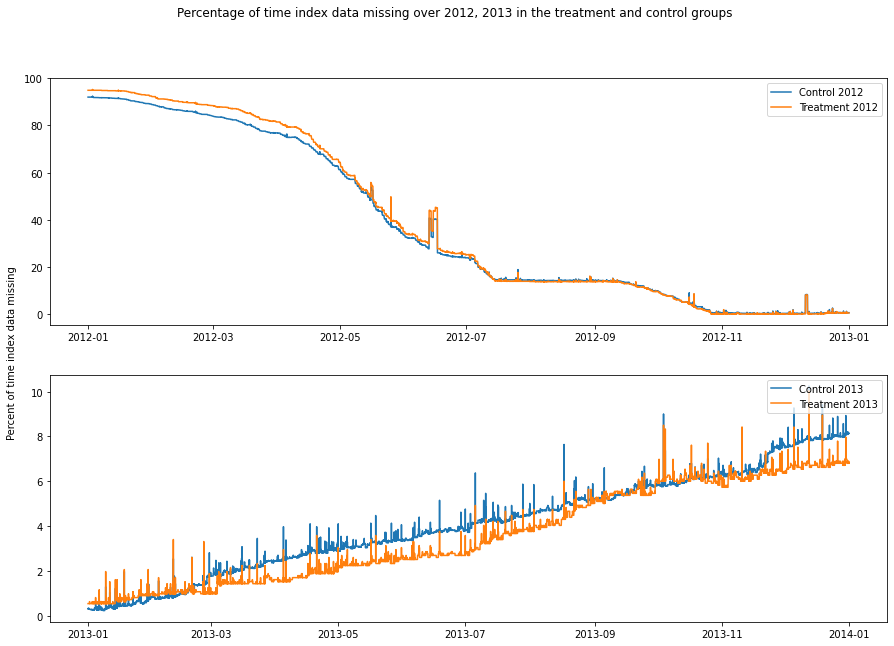

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Percentage of time index data missing over 2012, 2013 in the treatment and control groups')

ax[0].plot(get_percentage_time_missing(a_2012), label='Control 2012')
ax[0].plot(get_percentage_time_missing(b_2012), label='Treatment 2012')
ax[0].legend(loc=1)

ax[1].plot(get_percentage_time_missing(a_2013), label='Control 2013')
ax[1].plot(get_percentage_time_missing(b_2013), label='Treatment 2013')
ax[1].legend(loc=1)

fig.text(0.09, 0.5, 'Percent of time index data missing', ha='center', va='center', rotation='vertical')
plt.savefig('../figs/all_1213_percent_data_missing.png');

In [6]:
tariffs = pd.read_parquet('../data/tariffs.gzip')

lows = np.array(tariffs.index[tariffs['tariff'] == 'Low'], dtype=np.datetime64)
normals = np.array(tariffs.index[tariffs['tariff'] == 'Normal'], dtype=np.datetime64)
highs = np.array(tariffs.index[tariffs['tariff'] == 'High'], dtype=np.datetime64)

lows_2012 = lows - np.timedelta64(365, 'D')
normals_2012 = normals - np.timedelta64(365, 'D')
highs_2012 = highs - np.timedelta64(365, 'D')

In [7]:
# include a p/kWh & p/hh column that includes the price for that hh
total_usage_2012['p/kWh'] = 14.228
total_usage_2012['p/hh'] = total_usage_2012['KWH/hh'] * total_usage_2012['p/kWh']

total_usage_2013.loc[total_usage_2013['treated'], 'p/kWh'] = tariffs.loc[total_usage_2013.loc[total_usage_2013['treated'], 'date_time'], 'p/kWh'].values
total_usage_2013.loc[~total_usage_2013['treated'], 'p/kWh'] = 14.228
total_usage_2013['p/hh'] = total_usage_2013['KWH/hh'] * total_usage_2013['p/kWh']

In [8]:
total_acorn = pd.read_parquet('../data/total_acorn.gzip')

affluent = total_acorn.loc[total_acorn['acorn_category'] == 'Affluent']['house_id']
comfortable = total_acorn.loc[total_acorn['acorn_category'] == 'Comfortable']['house_id']
adversity = total_acorn.loc[total_acorn['acorn_category'] == 'Adversity']['house_id']

In [9]:
slice_2012 = total_usage_2012.loc[(total_usage_2012['date_time'].dt.normalize() >= '2012-07-01')]
slice_2013 = total_usage_2013.loc[(total_usage_2013['date_time'].dt.normalize() >= '2013-07-01')]

In [10]:
slice_2012_t, slice_2012_c = split_t_c(slice_2012)
slice_2013_t, slice_2013_c = split_t_c(slice_2013)

# per demographic - mean first #

In [93]:
# a_2012_aff = get_dem_mat(a_2012, affluent)
# a_2012_com = get_dem_mat(a_2012, comfortable)
# a_2012_adv = get_dem_mat(a_2012, adversity)

# a_2013_aff = get_dem_mat(a_2013, affluent)
# a_2013_com = get_dem_mat(a_2013, comfortable)
# a_2013_adv = get_dem_mat(a_2013, adversity)

# b_2012_aff = get_dem_mat(b_2012, affluent)
# b_2012_com = get_dem_mat(b_2012, comfortable)
# b_2012_adv = get_dem_mat(b_2012, adversity)

# b_2013_aff = get_dem_mat(b_2013, affluent)
# b_2013_com = get_dem_mat(b_2013, comfortable)
# b_2013_adv = get_dem_mat(b_2013, adversity)

a_2012_aff = get_dem_mat(a1_dropped, affluent)
a_2012_com = get_dem_mat(a1_dropped, comfortable)
a_2012_adv = get_dem_mat(a1_dropped, adversity)

a_2013_aff = get_dem_mat(a2_dropped, affluent)
a_2013_com = get_dem_mat(a2_dropped, comfortable)
a_2013_adv = get_dem_mat(a2_dropped, adversity)

b_2012_aff = get_dem_mat(b1_dropped, affluent)
b_2012_com = get_dem_mat(b1_dropped, comfortable)
b_2012_adv = get_dem_mat(b1_dropped, adversity)

b_2013_aff = get_dem_mat(b2_dropped, affluent)
b_2013_com = get_dem_mat(b2_dropped, comfortable)
b_2013_adv = get_dem_mat(b2_dropped, adversity)

In [94]:
a_2012_bar = pd.DataFrame([a_2012_aff.mean(axis=1), a_2012_com.mean(axis=1), a_2012_adv.mean(axis=1)], index=['aff', 'com', 'adv']).T
a_2013_bar = pd.DataFrame([a_2013_aff.mean(axis=1), a_2013_com.mean(axis=1), a_2013_adv.mean(axis=1)], index=['aff', 'com', 'adv']).T

b_2012_bar = pd.DataFrame([b_2012_aff.mean(axis=1), b_2012_com.mean(axis=1), b_2012_adv.mean(axis=1)], index=['aff', 'com', 'adv']).T
b_2013_bar = pd.DataFrame([b_2013_aff.mean(axis=1), b_2013_com.mean(axis=1), b_2013_adv.mean(axis=1)], index=['aff', 'com', 'adv']).T

In [95]:
b_2013_bar_est = find_counterfactual(a_2012_bar, b_2012_bar, a_2013_bar, b_2013_bar)

In [96]:
ME_consumption = pd.DataFrame([], index=['Affluent', 'Comfortable', 'Adversity'], columns=['Low', 'Normal', 'High', 'Overall'])
MPE_consumption = pd.DataFrame([], index=['Affluent', 'Comfortable', 'Adversity'], columns=['Low', 'Normal', 'High', 'Overall'])

In [97]:
b2 = b_2013_bar
b2_est = b_2013_bar_est

In [98]:
ME_consumption.loc['Affluent', 'Low'], MPE_consumption.loc['Affluent', 'Low'] = get_subset(b2, b2_est, lows, ['aff'])

ME_consumption.loc['Affluent', 'Normal'], MPE_consumption.loc['Affluent', 'Normal'] = get_subset(b2, b2_est, normals, ['aff'])

ME_consumption.loc['Affluent', 'High'], MPE_consumption.loc['Affluent', 'High'] = get_subset(b2, b2_est, highs, ['aff'])

ME_consumption.loc['Affluent', 'Overall'], MPE_consumption.loc['Affluent', 'Overall'] = get_subset(b2, b2_est, b2.index, ['aff'])

ME_consumption.loc['Comfortable', 'Low'], MPE_consumption.loc['Comfortable', 'Low'] = get_subset(b2, b2_est, lows, ['com'])

ME_consumption.loc['Comfortable', 'Normal'], MPE_consumption.loc['Comfortable', 'Normal'] = get_subset(b2, b2_est, normals, ['com'])

ME_consumption.loc['Comfortable', 'High'], MPE_consumption.loc['Comfortable', 'High'] = get_subset(b2, b2_est, highs, ['com'])

ME_consumption.loc['Comfortable', 'Overall'], MPE_consumption.loc['Comfortable', 'Overall'] = get_subset(b2, b2_est, b2.index, ['com'])

ME_consumption.loc['Adversity', 'Low'], MPE_consumption.loc['Adversity', 'Low'] = get_subset(b2, b2_est, lows, ['adv'])

ME_consumption.loc['Adversity', 'Normal'], MPE_consumption.loc['Adversity', 'Normal'] = get_subset(b2, b2_est, normals, ['adv'])

ME_consumption.loc['Adversity', 'High'], MPE_consumption.loc['Adversity', 'High'] = get_subset(b2, b2_est, highs, ['adv'])

ME_consumption.loc['Adversity', 'Overall'], MPE_consumption.loc['Adversity', 'Overall'] = get_subset(b2, b2_est, b2.index, ['adv'])

In [99]:
ME_consumption = ME_consumption.astype(float)
MPE_consumption = MPE_consumption.astype(float)

<AxesSubplot:>

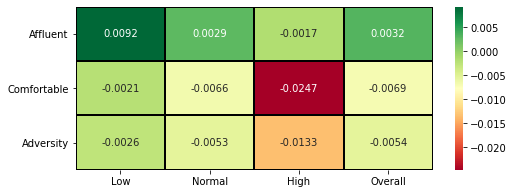

In [102]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
# sns.heatmap(MPE_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)

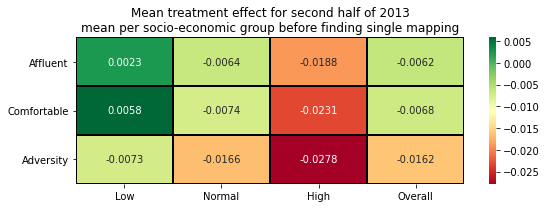

In [70]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean treatment effect for second half of 2013'
             '\n'
             r'mean per socio-economic group before finding single mapping')
plt.tight_layout()
plt.savefig('../figs/ME_consumption_socio_mean_first.png')

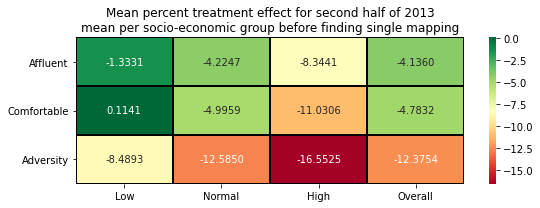

In [68]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(MPE_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean percent treatment effect for second half of 2013'
             '\n'
             r'mean per socio-economic group before finding single mapping')
plt.tight_layout()
plt.savefig('../figs/MPE_consumption_socio_mean_first.png')

# per demographic #

In [15]:
slice_2012_t_af = get_dem(slice_2012_t, affluent)
slice_2012_c_af = get_dem(slice_2012_c, affluent)
slice_2012_t_com = get_dem(slice_2012_t, comfortable)
slice_2012_c_com = get_dem(slice_2012_c, comfortable)
slice_2012_t_ad = get_dem(slice_2012_t, adversity)
slice_2012_c_ad = get_dem(slice_2012_c, adversity)

In [16]:
slice_2013_t_af = get_dem(slice_2013_t, affluent)
slice_2013_c_af = get_dem(slice_2013_c, affluent)
slice_2013_t_com = get_dem(slice_2013_t, comfortable)
slice_2013_c_com = get_dem(slice_2013_c, comfortable)
slice_2013_t_ad = get_dem(slice_2013_t, adversity)
slice_2013_c_ad = get_dem(slice_2013_c, adversity)

In [18]:
a1_dropped_af, b1_dropped_af, a2_dropped_af, b2_dropped_af = get_matrices_dropped(slice_2012_t_af, 
                                                                                  slice_2012_c_af, 
                                                                                  slice_2013_t_af, 
                                                                                  slice_2013_c_af, 
                                                                                  0)

before anything (8832, 1699) (8832, 486) (8832, 1612) (8832, 482)
after cleaning (8832, 559) (8832, 165) (8832, 669) (8832, 203)
after house intersection (8832, 249) (8832, 76) (8832, 249) (8832, 76)


In [19]:
b2_dropped_af_est = find_counterfactual(a1_dropped_af, b1_dropped_af, a2_dropped_af, b2_dropped_af)

In [20]:
a1_dropped_com, b1_dropped_com, a2_dropped_com, b2_dropped_com = get_matrices_dropped(slice_2012_t_com, 
                                                                                      slice_2012_c_com, 
                                                                                      slice_2013_t_com, 
                                                                                      slice_2013_c_com, 
                                                                                      0)

before anything (8832, 1179) (8832, 322) (8832, 1154) (8832, 311)
after cleaning (8832, 317) (8832, 92) (8832, 460) (8832, 126)
after house intersection (8832, 132) (8832, 45) (8832, 132) (8832, 45)


In [21]:
b2_dropped_com_est = find_counterfactual(a1_dropped_com, b1_dropped_com, a2_dropped_com, b2_dropped_com)

In [22]:
a1_dropped_ad, b1_dropped_ad, a2_dropped_ad, b2_dropped_ad = get_matrices_dropped(slice_2012_t_ad, 
                                                                                  slice_2012_c_ad, 
                                                                                  slice_2013_t_ad, 
                                                                                  slice_2013_c_ad, 
                                                                                  0)

before anything (8832, 1512) (8832, 296) (8832, 1450) (8832, 289)
after cleaning (8832, 447) (8832, 92) (8832, 517) (8832, 110)
after house intersection (8832, 188) (8832, 46) (8832, 188) (8832, 46)


In [23]:
b2_dropped_ad_est = find_counterfactual(a1_dropped_ad, b1_dropped_ad, a2_dropped_ad, b2_dropped_ad)

In [45]:
a1_imputed_af, b1_imputed_af, a2_imputed_af, b2_imputed_af = get_matrices_imputed(slice_2012_t_af, 
                                                                                  slice_2012_c_af, 
                                                                                  slice_2013_t_af, 
                                                                                  slice_2013_c_af)

before anything (8832, 1699) (8832, 486) (8832, 1612) (8832, 482)
after imputation (8832, 1699) (8832, 486) (8832, 1612) (8832, 482)
after house intersection (8832, 1610) (8832, 479) (8832, 1610) (8832, 479)


In [46]:
b2_imputed_af_est = find_counterfactual(a1_imputed_af, b1_imputed_af, a2_imputed_af, b2_imputed_af)

In [47]:
a1_imputed_com, b1_imputed_com, a2_imputed_com, b2_imputed_com = get_matrices_imputed(slice_2012_t_com, 
                                                                                      slice_2012_c_com, 
                                                                                      slice_2013_t_com, 
                                                                                      slice_2013_c_com)

before anything (8832, 1179) (8832, 322) (8832, 1154) (8832, 311)
after imputation (8832, 1179) (8832, 322) (8832, 1154) (8832, 311)
after house intersection (8832, 1153) (8832, 311) (8832, 1153) (8832, 311)


In [48]:
b2_imputed_com_est = find_counterfactual(a1_imputed_com, b1_imputed_com, a2_imputed_com, b2_imputed_com)

In [49]:
a1_imputed_ad, b1_imputed_ad, a2_imputed_ad, b2_imputed_ad = get_matrices_imputed(slice_2012_t_ad, 
                                                                                  slice_2012_c_ad, 
                                                                                  slice_2013_t_ad, 
                                                                                  slice_2013_c_ad)

before anything (8832, 1512) (8832, 296) (8832, 1450) (8832, 289)
after imputation (8832, 1512) (8832, 296) (8832, 1450) (8832, 289)
after house intersection (8832, 1447) (8832, 287) (8832, 1447) (8832, 287)


In [50]:
b2_imputed_ad_est = find_counterfactual(a1_imputed_ad, b1_imputed_ad, a2_imputed_ad, b2_imputed_ad)

In [62]:
ME_consumption = pd.DataFrame([], index=['Affluent', 'Comfortable', 'Adversity'], columns=['Low', 'Normal', 'High', 'Overall'])
MPE_consumption = pd.DataFrame([], index=['Affluent', 'Comfortable', 'Adversity'], columns=['Low', 'Normal', 'High', 'Overall'])

In [63]:
b2 = b2_dropped_af
b2_est = b2_dropped_af_est
# b2 = b2_imputed_af
# b2_est = b2_imputed_af_est

ME_consumption.loc['Affluent', 'Low'], MPE_consumption.loc['Affluent', 'Low'] = get_subset(b2, b2_est, lows, affluent)

ME_consumption.loc['Affluent', 'Normal'], MPE_consumption.loc['Affluent', 'Normal'] = get_subset(b2, b2_est, normals, affluent)

ME_consumption.loc['Affluent', 'High'], MPE_consumption.loc['Affluent', 'High'] = get_subset(b2, b2_est, highs, affluent)

ME_consumption.loc['Affluent', 'Overall'], MPE_consumption.loc['Affluent', 'Overall'] = get_subset(b2, b2_est, b2.index, affluent)



b2 = b2_dropped_com
b2_est = b2_dropped_com_est
# b2 = b2_imputed_com
# b2_est = b2_imputed_com_est

ME_consumption.loc['Comfortable', 'Low'], MPE_consumption.loc['Comfortable', 'Low'] = get_subset(b2, b2_est, lows, comfortable)

ME_consumption.loc['Comfortable', 'Normal'], MPE_consumption.loc['Comfortable', 'Normal'] = get_subset(b2, b2_est, normals, comfortable)

ME_consumption.loc['Comfortable', 'High'], MPE_consumption.loc['Comfortable', 'High'] = get_subset(b2, b2_est, highs, comfortable)

ME_consumption.loc['Comfortable', 'Overall'], MPE_consumption.loc['Comfortable', 'Overall'] = get_subset(b2, b2_est, b2.index, comfortable)



b2 = b2_dropped_ad
b2_est = b2_dropped_ad_est
# b2 = b2_imputed_ad
# b2_est = b2_imputed_ad_est

ME_consumption.loc['Adversity', 'Low'], MPE_consumption.loc['Adversity', 'Low'] = get_subset(b2, b2_est, lows, adversity)

ME_consumption.loc['Adversity', 'Normal'], MPE_consumption.loc['Adversity', 'Normal'] = get_subset(b2, b2_est, normals, adversity)

ME_consumption.loc['Adversity', 'High'], MPE_consumption.loc['Adversity', 'High'] = get_subset(b2, b2_est, highs, adversity)

ME_consumption.loc['Adversity', 'Overall'], MPE_consumption.loc['Adversity', 'Overall'] = get_subset(b2, b2_est, b2.index, adversity)

In [64]:
ME_consumption = ME_consumption.astype(float)
MPE_consumption = MPE_consumption.astype(float)

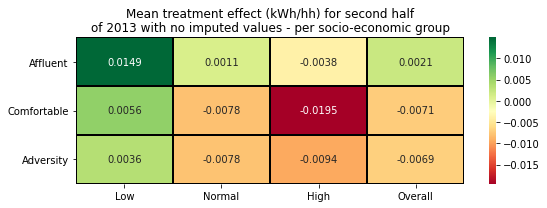

In [65]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean treatment effect (kWh/hh) for second half'
             '\n'
             r'of 2013 with no imputed values - per socio-economic group')
plt.tight_layout()
plt.savefig('../figs/ME_dropped_consumption_socio.png')

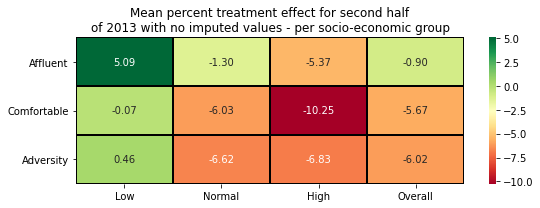

In [66]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(MPE_consumption, annot=True, fmt='.2f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean percent treatment effect for second half'
             '\n'
             r'of 2013 with no imputed values - per socio-economic group')
plt.tight_layout()
plt.savefig('../figs/MPE_dropped_consumption_socio.png')

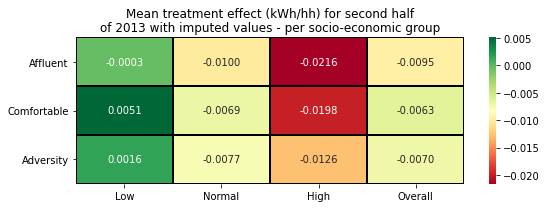

In [60]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean treatment effect (kWh/hh) for second half'
             '\n'
             r'of 2013 with imputed values - per socio-economic group')
plt.tight_layout()
plt.savefig('../figs/ME_imputed_consumption_socio.png')

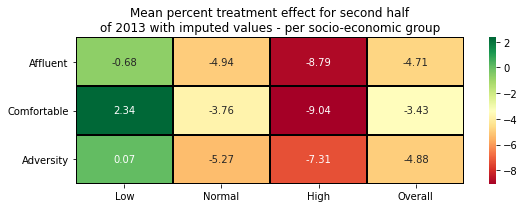

In [61]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(MPE_consumption, annot=True, fmt='.2f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean percent treatment effect for second half'
             '\n'
             r'of 2013 with imputed values - per socio-economic group')
plt.tight_layout()
plt.savefig('../figs/MPE_imputed_consumption_socio.png')

# Altogether #

In [71]:
a1_dropped, b1_dropped, a2_dropped, b2_dropped = get_matrices_dropped(slice_2012_t, slice_2012_c, slice_2013_t, slice_2013_c, 0)

before anything (8832, 4428) (8832, 1116) (8832, 4253) (8832, 1093)
after cleaning (8832, 1332) (8832, 352) (8832, 1665) (8832, 443)
after house intersection (8832, 570) (8832, 168) (8832, 570) (8832, 168)


In [72]:
a1_dropped_inv = np.linalg.pinv(a1_dropped)
X = a1_dropped_inv @ b1_dropped.to_numpy()
b2_dropped_est_ = a2_dropped.to_numpy() @ X

b2_dropped_est = pd.DataFrame(b2_dropped_est_, columns=b2_dropped.columns, index=b2_dropped.index)

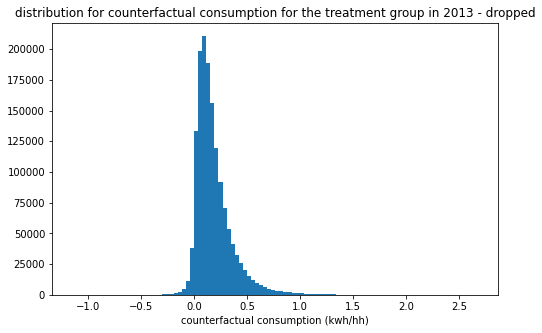

In [90]:
plt.figure(figsize=(8, 5))
plt.hist(b2_dropped_est.values.flatten(), bins=100);

plt.xlabel('counterfactual consumption (kwh/hh)')
plt.title('distribution for counterfactual consumption for the treatment group in 2013 - dropped')
plt.savefig('../figs/counterfactual_estimation_distribution');

In [ ]:
a1_imputed, b1_imputed, a2_imputed, b2_imputed = get_matrices_imputed(slice_2012_t, slice_2012_c, slice_2013_t, slice_2013_c)

In [ ]:
a1_imputed_inv = np.linalg.pinv(a1_imputed)
X = a1_imputed_inv @ b1_imputed.to_numpy()
b2_imputed_est_ = a2_imputed.to_numpy() @ X

b2_imputed_est = pd.DataFrame(b2_imputed_est_, columns=b2_imputed.columns, index=b2_imputed.index)

In [ ]:
plt.hist(b2_imputed_est.flat, bins=100);

plt.xlabel('counterfactual consumption (kwh/hh)')
plt.title('distribution for counterfactual consumption for the treatment group in 2013 - imputed');

In [16]:
print('difference first, mean error:', (b2_imputed - b2_imputed_est).mean(axis=1).mean())
print('difference first, mean percent error:', ((b2_imputed - b2_imputed_est)/b2_imputed*100).mean(axis=1).mean())
print('mean first, mean error:', (b2_imputed.mean(axis=1) - b2_imputed_est.mean(axis=1)).mean())
print('mean first, mean percent error:', ((b2_imputed.mean(axis=1) - b2_imputed_est.mean(axis=1))/b2_imputed.mean(axis=1)*100).mean())

difference first, mean error: -0.010391663165029062
difference first, mean percent error: -inf
mean first, mean error: -0.010391663165029064
mean first, mean percent error: -5.683878917017437


In [17]:
print('difference first, mean error:', (b2_dropped - b2_dropped_est).mean(axis=1).mean())
print('difference first, mean percent error:', ((b2_dropped - b2_dropped_est)/b2_dropped*100).mean(axis=1).mean())
print('mean first, mean error:', (b2_dropped.mean(axis=1) - b2_dropped_est.mean(axis=1)).mean())
print('mean first, mean percent error:', ((b2_dropped.mean(axis=1) - b2_dropped_est.mean(axis=1))/b2_dropped.mean(axis=1)*100).mean())

difference first, mean error: -0.0006175616317190875
difference first, mean percent error: nan
mean first, mean error: -0.0006175616317190866
mean first, mean percent error: -0.9737095135578335


In [ ]:
unique_house_per_hh_2012_c = unique_house_per_hh(slice_2012_c)
unique_house_per_hh_2013_c = unique_house_per_hh(slice_2013_c)

unique_house_per_hh_2012_t = unique_house_per_hh(slice_2012_t)
unique_house_per_hh_2013_t = unique_house_per_hh(slice_2013_t)

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
fig.suptitle('Unique houses in treatment and control group in the latter six months of 2012 and 2013')

ax[0].plot(unique_house_per_hh_2012_t.values, label='2012')
ax[0].plot(unique_house_per_hh_2013_t.values, label='2013')
ax[0].set_ylabel('Unique houses in treatment group')
ax[0].set_xlabel('Number of days')
ax[0].legend(loc=1)

ax[1].plot(unique_house_per_hh_2012_c.values, label='2012')
ax[1].plot(unique_house_per_hh_2013_c.values, label='2013')
ax[1].set_ylabel('Unique houses in control group')
ax[1].set_xlabel('Number of days')
plt.legend(loc=1);
# plt.savefig('../figs/unique_houses_second_six_months.png');

In [10]:
ME_consumption = pd.DataFrame([], index=['Affluent', 'Comfortable', 'Adversity', 'Overall'], columns=['Low', 'Normal', 'High', 'Overall'])
MPE_consumption = pd.DataFrame([], index=['Affluent', 'Comfortable', 'Adversity', 'Overall'], columns=['Low', 'Normal', 'High', 'Overall'])

In [11]:
b2 = b2_imputed
b2_est = b2_imputed_est

# b2 = b2_dropped
# b2_est = b2_dropped_est

In [12]:
ME_consumption.loc['Affluent', 'Low'], MPE_consumption.loc['Affluent', 'Low'] = get_subset(b2, b2_est, lows, affluent)

ME_consumption.loc['Affluent', 'Normal'], MPE_consumption.loc['Affluent', 'Normal'] = get_subset(b2, b2_est, normals, affluent)

ME_consumption.loc['Affluent', 'High'], MPE_consumption.loc['Affluent', 'High'] = get_subset(b2, b2_est, highs, affluent)

ME_consumption.loc['Affluent', 'Overall'], MPE_consumption.loc['Affluent', 'Overall'] = get_subset(b2, b2_est, b2.index, affluent)

ME_consumption.loc['Comfortable', 'Low'], MPE_consumption.loc['Comfortable', 'Low'] = get_subset(b2, b2_est, lows, comfortable)

ME_consumption.loc['Comfortable', 'Normal'], MPE_consumption.loc['Comfortable', 'Normal'] = get_subset(b2, b2_est, normals, comfortable)

ME_consumption.loc['Comfortable', 'High'], MPE_consumption.loc['Comfortable', 'High'] = get_subset(b2, b2_est, highs, comfortable)

ME_consumption.loc['Comfortable', 'Overall'], MPE_consumption.loc['Comfortable', 'Overall'] = get_subset(b2, b2_est, b2.index, comfortable)

ME_consumption.loc['Adversity', 'Low'], MPE_consumption.loc['Adversity', 'Low'] = get_subset(b2, b2_est, lows, adversity)

ME_consumption.loc['Adversity', 'Normal'], MPE_consumption.loc['Adversity', 'Normal'] = get_subset(b2, b2_est, normals, adversity)

ME_consumption.loc['Adversity', 'High'], MPE_consumption.loc['Adversity', 'High'] = get_subset(b2, b2_est, highs, adversity)

ME_consumption.loc['Adversity', 'Overall'], MPE_consumption.loc['Adversity', 'Overall'] = get_subset(b2, b2_est, b2.index, adversity)

ME_consumption.loc['Overall', 'Low'], MPE_consumption.loc['Overall', 'Low'] = get_subset(b2, b2_est, lows, b2.columns)

ME_consumption.loc['Overall', 'Normal'], MPE_consumption.loc['Overall', 'Normal'] = get_subset(b2, b2_est, normals, b2.columns)

ME_consumption.loc['Overall', 'High'], MPE_consumption.loc['Overall', 'High'] = get_subset(b2, b2_est, highs, b2.columns)

ME_consumption.loc['Overall', 'Overall'], MPE_consumption.loc['Overall', 'Overall'] = get_subset(b2, b2_est, b2.index, b2.columns)

In [65]:
# b2_normal_affluent = b2.loc[b2.index.isin(normals), b2.columns.isin(affluent)]
# b2_est_normal_affluent = b2_est.loc[b2_est.index.isin(normals), b2_est.columns.isin(affluent)]
# print((b2_normal_affluent - b2_est_normal_affluent).mean().mean() / b2_est_normal_affluent.mean().mean())

# b2_normal_comfortable = b2.loc[b2.index.isin(normals), b2.columns.isin(comfortable)]
# b2_est_normal_comfortable = b2_est.loc[b2_est.index.isin(normals), b2_est.columns.isin(comfortable)]
# print((b2_normal_comfortable - b2_est_normal_comfortable).mean().mean() / b2_est_normal_comfortable.mean().mean())

# b2_normal_adversity = b2.loc[b2.index.isin(normals), b2.columns.isin(adversity)]
# b2_est_normal_adversity = b2_est.loc[b2_est.index.isin(normals), b2_est.columns.isin(adversity)]
# print((b2_normal_adversity - b2_est_normal_adversity).mean().mean() / b2_est_normal_adversity.mean().mean())


# b2_low_affluent = b2.loc[b2.index.isin(lows), b2.columns.isin(affluent)]
# b2_est_low_affluent = b2_est.loc[b2_est.index.isin(lows), b2_est.columns.isin(affluent)]
# print((b2_low_affluent - b2_est_low_affluent).mean().mean() / b2_low_affluent.mean().mean())

# b2_low_comfortable = b2.loc[b2.index.isin(lows), b2.columns.isin(comfortable)]
# b2_est_low_comfortable = b2_est.loc[b2_est.index.isin(lows), b2_est.columns.isin(comfortable)]
# print((b2_low_comfortable - b2_est_low_comfortable).mean().mean() / b2_low_comfortable.mean().mean())

# b2_low_adversity = b2.loc[b2.index.isin(lows), b2.columns.isin(adversity)]
# b2_est_low_adversity = b2_est.loc[b2_est.index.isin(lows), b2_est.columns.isin(adversity)]
# print((b2_low_adversity - b2_est_low_adversity).mean().mean() / b2_low_adversity.mean().mean())

In [13]:
ME_imputed_consumption = ME_consumption
MPE_imputed_consumption = MPE_consumption

# ME_dropped_consumption = ME_consumption
# MPE_dropped_consumption = MPE_consumption

In [69]:
# ME_imputed_consumption.to_csv('~/Downloads/ME_imputed_consumption.csv')
# MPE_imputed_consumption.to_csv('~/Downloads/MPE_imputed_consumption.csv')
# ME_dropped_consumption.to_csv('~/Downloads/ME_dropped_consumption.csv')
# MPE_dropped_consumption.to_csv('~/Downloads/MPE_dropped_consumption.csv')

In [15]:
ME_imputed_consumption = ME_imputed_consumption.astype(float)
MPE_imputed_consumption = MPE_imputed_consumption.astype(float)
# ME_dropped_consumption = ME_dropped_consumption.astype(float)
# MPE_dropped_consumption = MPE_dropped_consumption.astype(float)

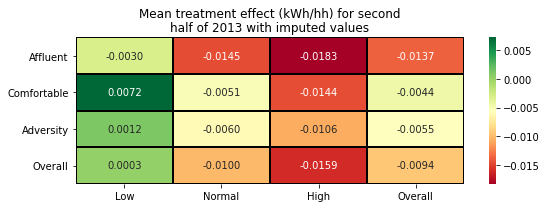

In [16]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_imputed_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean treatment effect (kWh/hh) for second'
             '\n'
             r'half of 2013 with imputed values')
plt.tight_layout()
plt.savefig('../figs/ME_imputed_consumption.png')

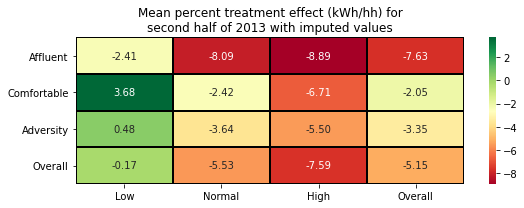

In [17]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(MPE_imputed_consumption, annot=True, fmt='.2f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean percent treatment effect for'
             '\n'
             r'second half of 2013 with imputed values')
plt.tight_layout()
plt.savefig('../figs/MPE_imputed_consumption.png')

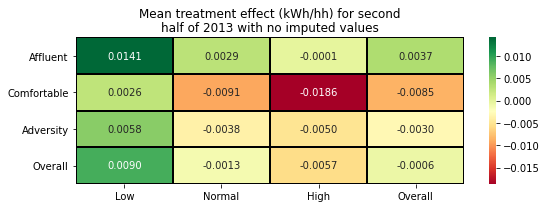

In [173]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(ME_dropped_consumption, annot=True, fmt='.4f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean treatment effect (kWh/hh) for second'
             '\n'
             r'half of 2013 with no imputed values')
plt.tight_layout()
plt.savefig('../figs/ME_dropped_consumption.png')

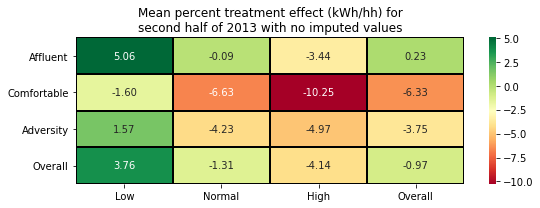

In [175]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(MPE_dropped_consumption, annot=True, fmt='.2f', linewidths=1, linecolor='black', cmap='RdYlGn', ax=ax)
ax.set_title(r'Mean percent treatment effect for'
             '\n'
             r'second half of 2013 with no imputed values')
plt.tight_layout()
plt.savefig('../figs/MPE_dropped_consumption.png')

In [176]:
# MPE_dropped_consumption.style.background_gradient(cmap='RdYlGn')
# MPE_imputed_consumption.style.background_gradient(cmap='YlGnBu')

- https://stackoverflow.com/questions/42712304/seaborn-heatmap-subplots-keep-axis-ratio-consistent
- https://stackoverflow.com/questions/43073971/control-individual-linewidths-in-seaborn-heatmap